In [6]:
import cv2
import numpy as np
%pylab inline
from scipy import ndimage
import scipy

Populating the interactive namespace from numpy and matplotlib


/home/juanchosol1996/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
img = cv2.imread('./FeNod_50X_L.tif')
img = img[1000:1500,750:1000]
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [19]:

sx = ndimage.sobel(gray, axis=0, mode='constant')
sy = ndimage.sobel(gray, axis=1, mode='constant')
sob = np.hypot(sx, sy)
gray.dtype
#plt.imshow(sob)
#plt.show()

dtype('uint8')

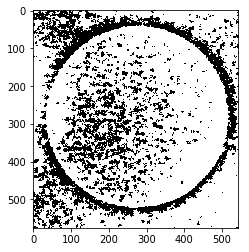

In [61]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
plt.imshow(opening,cmap=cm.gray)
plt.show()

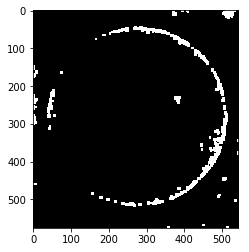

In [53]:
sure_fg = cv2.erode(opening,kernel,iterations=1)
plt.imshow(sure_fg,cmap=cm.gray)
plt.show()


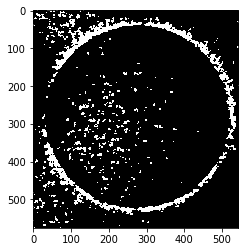

In [23]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(sure_fg,cmap=cm.gray)
plt.show()

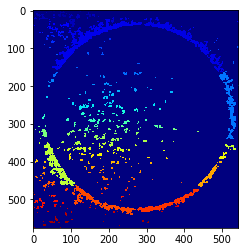

In [43]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers, cmap= cm.jet)

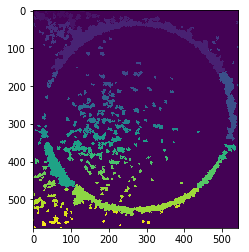

In [44]:
markers2 = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

markers2